In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PyOMA as oma
import obspy

from scipy import signal
from obspy.clients.filesystem.sds import Client

In [2]:
def __get_data_all(config):

    net, sta, loc, cha = config['seed'].split(".")

    st0 = obspy.Stream()

    for sta in config['stations']:

        try:
            st = config['client'].get_waveforms(network=net, station=sta, location=loc, channel=cha, 
                                                starttime=config['tbeg'], endtime=config['tend'])

            if len(st) == 0:
                raise "no data in stream"

            inv = obspy.read_inventory(config['inventories']+f"XX.{sta}.xml")


            st = st.remove_response(inventory=inv, output="VEL", water_level=60, plot=False) 

            st.merge()

            st0 += st

        except:
            print(f" -> loading failed for: {sta}")

    return st0

In [123]:
config = {}

## Kermadec M7.0 Event
# config['tbeg'] = obspy.UTCDateTime("2023-03-16 00:50")
# config['tend'] = obspy.UTCDateTime("2023-03-16 03:30")

## PNG M7.0 Event
# config['tbeg'] = obspy.UTCDateTime("2023-04-02 18:00")
# config['tend'] = obspy.UTCDateTime("2023-04-02 20:30")

## Local Event
# config['tbeg'] = obspy.UTCDateTime("2023-04-02 20:15")
# config['tend'] = obspy.UTCDateTime("2023-04-02 20:19")

## Local Noise
config['tbeg'] = obspy.UTCDateTime("2023-04-08 00:00")
config['tend'] = obspy.UTCDateTime("2023-04-08 00:30")
# config['tend'] = obspy.UTCDateTime("2023-04-08 03:00")

config['client'] = Client("/import/freenas-ffb-01-data/ModalAnalysis/data/SDS")

config['seed'] = "XX.RY??..HH*"

config['stations'] = ['RY01','RY02','RY03','RY04','RY05','RY06','RY07','RY08','RY09','RY10']

config['inventories'] = "/import/freenas-ffb-01-data/ModalAnalysis/data/StationXML/"

config['fmin'] = 0.1
config['fmax'] = 50.0

## Load Data

In [124]:
st0 = __get_data_all(config)
# st0 = obspy.read("./noise_data.mseed")

 -> loading failed for: RY10


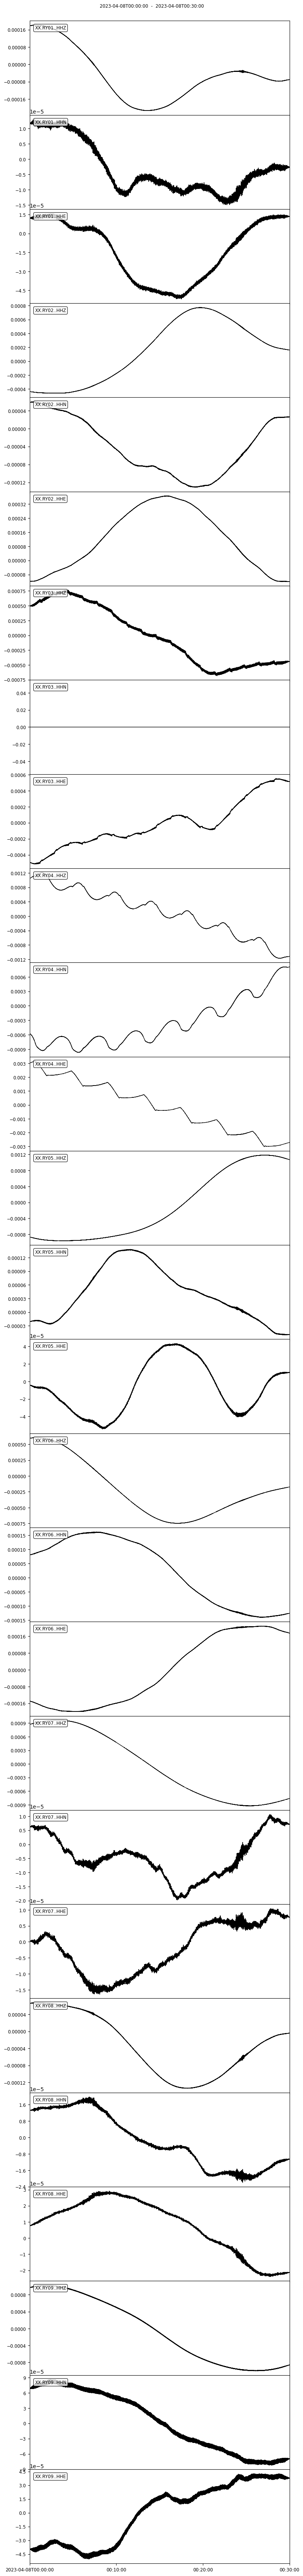

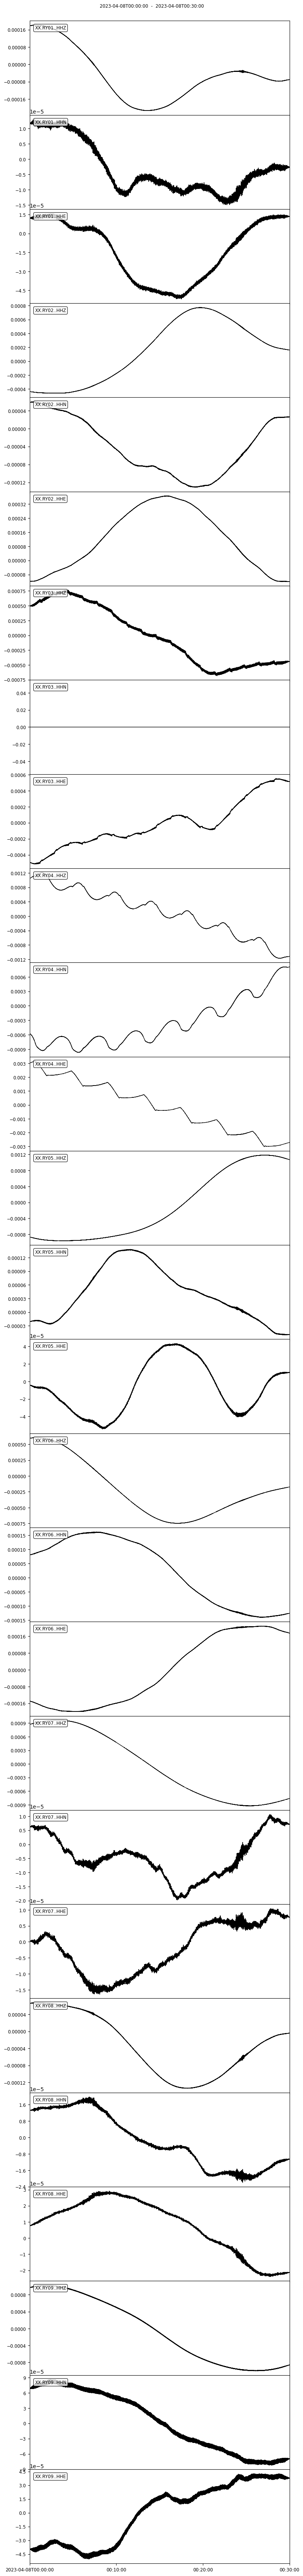

In [125]:
st0.plot(equal_scale=False)

## Pre-Process Data

In [126]:
st = st0.copy();

st.sort();

## bandpass filter
st.detrend("simple");
st.taper(0.1);
st.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=8, zerophase=True);

## resample data
st.resample(config['fmax']);

## remove corrupted data
for tr in st:
    if tr.stats.station in ["RY04","RY03"]:
        st.remove(tr);

## extract sampling rate
fs = st[0].stats.sampling_rate # [Hz] Sampling Frequency

27 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:30:00.000000Z | 200.0 Hz, 360001 samples
...
(25 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:30:00.000000Z | 200.0 Hz, 360001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

27 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:30:00.000000Z | 200.0 Hz, 360001 samples
...
(25 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:30:00.000000Z | 200.0 Hz, 360001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

27 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:30:00.000000Z | 200.0 Hz, 360001 samples
...
(25 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:30:00.000000Z | 200.0 Hz, 360001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

27 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:30:00.000000Z | 200.0 Hz, 360001 samples
...
(25 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:30:00.000000Z | 200.0 Hz, 360001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

27 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples
...
(25 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

26 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples
...
(24 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

25 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples
...
(23 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

24 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples
...
(22 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

23 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples
...
(21 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

22 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples
...
(20 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

21 Trace(s) in Stream:

XX.RY01..HHE | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples
...
(19 other traces)
...
XX.RY09..HHZ | 2023-04-08T00:00:00.000000Z - 2023-04-08T00:29:59.980000Z | 50.0 Hz, 90000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

## Prepare 2D-Array for Analysis

2D array required for methods (columns=sensors, rows=data)

RY01
RY02
RY05
RY06
RY07
RY08
RY09


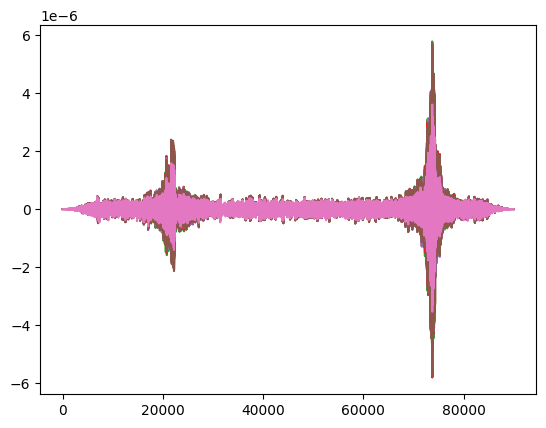

In [127]:
data = []
for tr in st:
    if "Z" in tr.stats.channel:
        data.append(tr.data)
        print(tr.stats.station)

data = np.array(data).transpose()

plt.plot(data)

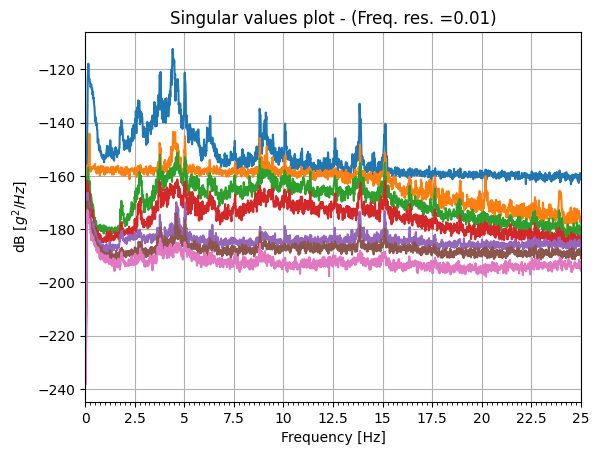

In [128]:
# ======== ANALYSIS ===========================================================
# Run FDD
FDD = oma.FDDsvp(data,  fs)

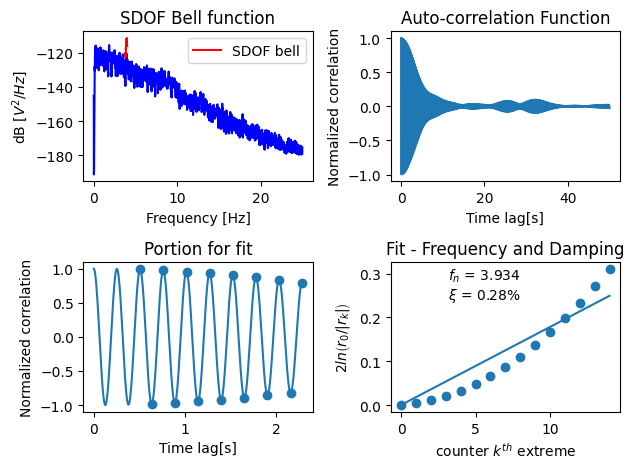

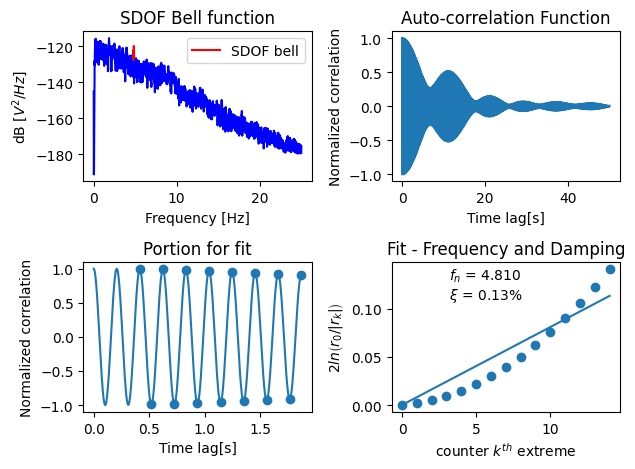

In [122]:
# Define list/array with the peaks identified from the plot
# FreQ = [0.89, 2.6, 4.1, 5.27, 6] # identified peaks
FreQ = [3.8, 4.8] # identified peaks

# Extract the modal properties
Res_FDD = oma.FDDmodEX(FreQ, FDD[1])
Res_EFDD = oma.EFDDmodEX(FreQ, FDD[1], method='EFDD')
Res_FSDD = oma.EFDDmodEX(FreQ, FDD[1], method='FSDD', npmax=15, MAClim=0.95, plot=True)

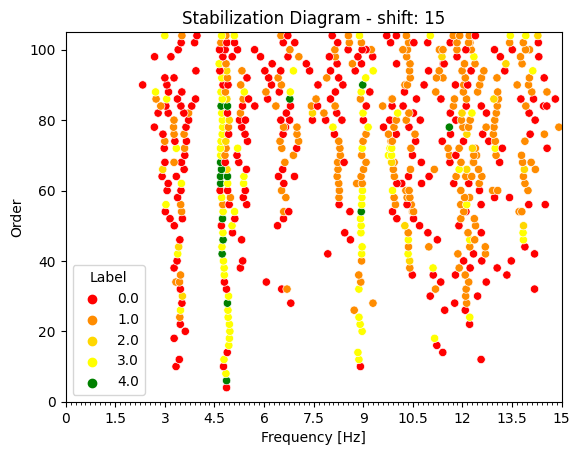

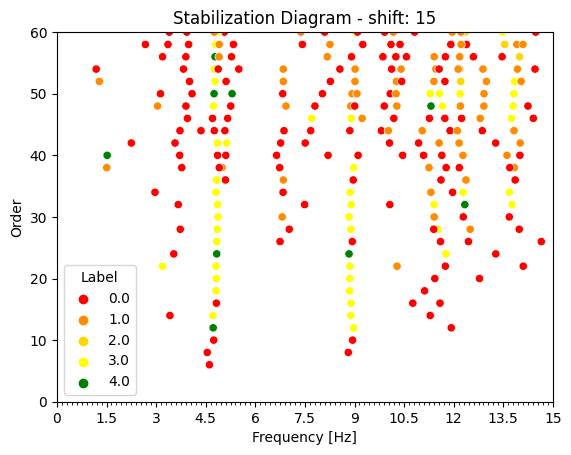

In [102]:
# Run SSI
br = 15
SSIcov= oma.SSIcovStaDiag(data, fs, br)
SSIdat = oma.SSIdatStaDiag(data, fs, br, ordmax=60, lim=(0.01, 0.05, 0.02, 0.1))

# Extract the modal properties
Res_SSIcov = oma.SSIModEX(FreQ, SSIcov[1])
Res_SSIdat= oma.SSIModEX(FreQ, SSIdat[1])

In [ ]:
# =============================================================================
# Make some plots
# =============================================================================
MS_FDD = Res_FDD['Mode Shapes'].real
MS_EFDD = Res_EFDD['Mode Shapes'].real
MS_FSDD = Res_FSDD['Mode Shapes'].real
MS_SSIcov = Res_SSIcov['Mode Shapes'].real
MS_SSIdat = Res_SSIdat['Mode Shapes'].real
_nch = data.shape[1]

MAC = np.reshape(
        [oma.MaC(FI_ex[:,l], MS_FSDD[:,k]).real for k in range(_nch) for l in range(_nch)], # (_nch*_nch) list of MAC values
        (_nch, _nch)) # new (real) shape (_nch x _nch) of the MAC matrix

crossMAC = np.reshape(
        [oma.MaC(MS_SSIcov[:,l], MS_SSIdat[:,k]).real for k in range(_nch) for l in range(_nch)], # (_nch*_nch) list of MAC values
        (_nch,_nch)) # new (real) shape (_nch x _nch) of the MAC matrix

col = ["mode I", "mode II"]
# col = ["mode I", "mode II", "mode III", "mode IV", "mode V"]

MAC = pd.DataFrame(MAC, columns=col, index=col)
crossMAC = pd.DataFrame(crossMAC, columns=col, index=col)

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(MAC,cmap="jet",ax=ax,annot=True, fmt='.3f',)
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots()
sns.heatmap(crossMAC,cmap="jet", ax=ax1, annot=True, fmt='.3f',)
fig.tight_layout()
plt.show()